In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras


# The Required Inputs and Data

In [2]:
imdb= keras.datasets.imdb
(train_data, train_labels),(test_data, test_labels)=imdb.load_data(num_words=10000)

In [3]:
print('training entries:{},label:{}'.format(len(train_data),len(train_labels)))

training entries:25000,label:25000


In [4]:
#show the head of data
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
# every record has different length
print(len(train_data[0]))
print(len(train_data[1]))

218
189


In [6]:
test_labels.mean()

0.5

In [7]:
train_labels.mean()

0.5

In [8]:
print("Categories:", np.unique(train_labels))
print("Number of unique words:", len(np.unique(np.hstack(train_data))))

length = [len(i) for i in train_data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 238.71364
Standard Deviation: 176.0


# data preprocessing

In [9]:
#decode
word_index= imdb.get_word_index()
word_index


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
word_index1={k:(v+3)for k,v in word_index.items()}
word_index1

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [11]:
reverse_word_index=dict([(v,k) for (k,v)in word_index.items()])

In [12]:
word= ' '.join([reverse_word_index.get(i-3,'#') for i in train_data[0]])

In [13]:
word

"# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,
                                                    padding='post',
                                                     maxlen=300)

In [15]:
train_data[2]

array([   1,   14,   47,    8,   30,   31,    7,    4,  249,  108,    7,
          4, 5974,   54,   61,  369,   13,   71,  149,   14,   22,  112,
          4, 2401,  311,   12,   16, 3711,   33,   75,   43, 1829,  296,
          4,   86,  320,   35,  534,   19,  263, 4821, 1301,    4, 1873,
         33,   89,   78,   12,   66,   16,    4,  360,    7,    4,   58,
        316,  334,   11,    4, 1716,   43,  645,  662,    8,  257,   85,
       1200,   42, 1228, 2578,   83,   68, 3912,   15,   36,  165, 1539,
        278,   36,   69,    2,  780,    8,  106,   14, 6905, 1338,   18,
          6,   22,   12,  215,   28,  610,   40,    6,   87,  326,   23,
       2300,   21,   23,   22,   12,  272,   40,   57,   31,   11,    4,
         22,   47,    6, 2307,   51,    9,  170,   23,  595,  116,  595,
       1352,   13,  191,   79,  638,   89,    2,   14,    9,    8,  106,
        607,  624,   35,  534,    6,  227,    7,  129,  113,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
print(len(train_data[0]))

300


In [17]:
print(len(train_data[1]))

300


In [18]:
test_data=keras.preprocessing.sequence.pad_sequences(test_data,
                                                    padding='post',
                                                     maxlen=300)

In [19]:
print(len(test_data[0]))

300


In [20]:
print(len(test_data[1]))

300


# Keras Model

In [21]:
# use global average pooling blocks as an alternative to the flattening
# block after the last pooling block of you rconvolutional neural network. 
model = keras.Sequential()
# Input - Layer
model.add(keras.layers.Embedding(10000, 32))
model.add(keras.layers.GlobalAveragePooling1D())
# Hidden - Layers
model.add(keras.layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(keras.layers.Dense(32, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
# Output- Layer
model.add(keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________________

In [22]:
# compiling the model
model.compile(optimizer ='Adam',
 loss = "binary_crossentropy",
 metrics = ["accuracy"])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
x_val = train_data[:10000]
x_train = train_data[10000:]
y_val = train_labels[:10000]
y_train = train_labels[10000:]

In [24]:
results = model.fit(
 x_train, y_train,
 epochs= 40,
 batch_size = 600,
 validation_data = (x_val, y_val)
)
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 223us/sample - loss: 0.6918 - acc: 0.5699 - val_loss: 0.6895 - val_acc: 0.6039
Epoch 2/40
15000/15000 [==============================] - 2s 158us/sample - loss: 0.6851 - acc: 0.6553 - val_loss: 0.6791 - val_acc: 0.7359
Epoch 3/40
15000/15000 [==============================] - 2s 140us/sample - loss: 0.6678 - acc: 0.7211 - val_loss: 0.6556 - val_acc: 0.7521
Epoch 4/40
15000/15000 [==============================] - 3s 171us/sample - loss: 0.6346 - acc: 0.7505 - val_loss: 0.6166 - val_acc: 0.7657
Epoch 5/40
15000/15000 [==============================] - 3s 175us/sample - loss: 0.5875 - acc: 0.7829 - val_loss: 0.5657 - val_acc: 0.8005
Epoch 6/40
15000/15000 [==============================] - 2s 156us/sample - loss: 0.5291 - acc: 0.8159 - val_loss: 0.5107 - val_acc: 0.8230
Epoch 7/40
15000/15000 [==============================] - 2s 125us/sample - loss: 0.4703 - acc: 0.8409 - val_l

In [25]:
results.history['acc']

[0.56993335,
 0.65533334,
 0.72106665,
 0.75046664,
 0.78293335,
 0.81593335,
 0.8409333,
 0.8594667,
 0.87266666,
 0.88453335,
 0.8946667,
 0.90146667,
 0.909,
 0.9140667,
 0.92233336,
 0.92653334,
 0.93233335,
 0.93486667,
 0.93946666,
 0.941,
 0.9482,
 0.9538,
 0.95413333,
 0.95746666,
 0.9598,
 0.9626667,
 0.9662667,
 0.9672,
 0.9694,
 0.97173333,
 0.9742,
 0.9764,
 0.97826666,
 0.9803333,
 0.98053336,
 0.98193336,
 0.984,
 0.98586667,
 0.9863333,
 0.9877333]

# Model Evaluation

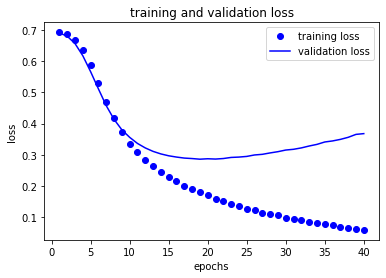

In [26]:
import matplotlib.pyplot as plt

acc=results.history['acc']
val_acc=results.history['val_acc']
loss=results.history['loss']
val_loss=results.history['val_loss']
epochs= range(1,len(acc)+1)

plt.plot(epochs, loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

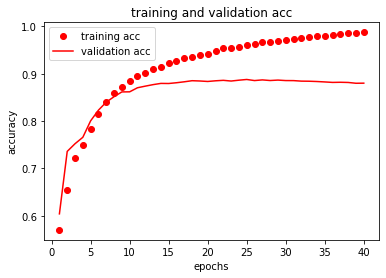

In [27]:
plt.clf()


plt.plot(epochs, acc,'ro',label='training acc')
plt.plot(epochs, val_acc,'r',label='validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

# Save Model

In [28]:
model.save('my_model.h5') 

In [29]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________________